In [1]:
import polars as pl
import pandas as pd
import glob
import json
from pathlib import Path
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Prep df

In [2]:
df = pd.read_excel('raw_input.xlsx')
df

,startTime,endTime,preSignedUrl,meta.data,id
0,2023-07-01T00:08:07.743Z,2023-07-01T00:12:35.268Z,https://collector.neiry-bci.com/temp-links/042...,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",1
1,2023-07-01T00:08:07.743Z,2023-07-01T00:12:35.268Z,https://collector.neiry-bci.com/temp-links/e28...,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",2
2,2023-07-01T05:27:24.738Z,2023-07-01T05:29:47.336Z,https://collector.neiry-bci.com/temp-links/da0...,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",3
3,2023-07-01T05:27:24.738Z,2023-07-01T05:29:47.336Z,https://collector.neiry-bci.com/temp-links/4cb...,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",4
4,2023-07-01T05:47:50.830Z,2023-07-01T05:54:25.970Z,https://collector.neiry-bci.com/temp-links/4d5...,"{""appInfo"":{""clientVersion"":""v0.4.0-4b8c00b8d ...",5
...,...,...,...,...,...
58344,2024-02-20T10:12:08.740Z,2024-02-20T10:29:01.514Z,https://collector.neiry-bci.com/temp-links/4a7...,"{""appInfo"":{""clientName"":""Mind Tracker BCI"",""c...",58345
58345,2024-02-20T10:35:59.170Z,2024-02-20T10:42:21.342Z,https://collector.neiry-bci.com/temp-links/6a9...,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",58346
58346,2024-02-20T10:35:59.170Z,2024-02-20T10:42:21.342Z,https://collector.neiry-bci.com/temp-links/5d9...,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",58347
58347,2024-02-20T11:26:51.867Z,2024-02-20T11:27:33.837Z,https://collector.neiry-bci.com/temp-links/10d...,"{""appInfo"":{""clientName"":""Mind Tracker BCI"",""c...",58348


In [3]:
assert (df['preSignedUrl'].str.slice(0, 43) == "https://collector.neiry-bci.com/temp-links/").all()

df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])

df['download_url_key'] = df['preSignedUrl'].str.split('/').str[-1]
df.drop(columns='preSignedUrl', inplace=True)

get_session_id = lambda x: json.loads(x)['sessionInfo']['capsuleSessionId']
df['session_id'] = df['meta.data'].apply(get_session_id)

df = df.dropna()

df

,startTime,endTime,meta.data,id,download_url_key,session_id
0,2023-07-01 00:08:07.743000+00:00,2023-07-01 00:12:35.268000+00:00,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",1,0420fe7d-1500-4308-adcd-edd95be1de47,d85040a8-5535-463f-929b-5e2fe50aec7b
1,2023-07-01 00:08:07.743000+00:00,2023-07-01 00:12:35.268000+00:00,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",2,e28d0f90-3efe-4b66-8758-c3f2e41cb20d,d85040a8-5535-463f-929b-5e2fe50aec7b
2,2023-07-01 05:27:24.738000+00:00,2023-07-01 05:29:47.336000+00:00,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",3,da055437-87e5-4d62-9f30-49eee4bdd5ca,72b2b92b-4fbc-411e-b20b-5706888ab12a
3,2023-07-01 05:27:24.738000+00:00,2023-07-01 05:29:47.336000+00:00,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",4,4cb8d191-1c93-413a-84f3-2ef0b9ed5105,72b2b92b-4fbc-411e-b20b-5706888ab12a
4,2023-07-01 05:47:50.830000+00:00,2023-07-01 05:54:25.970000+00:00,"{""appInfo"":{""clientVersion"":""v0.4.0-4b8c00b8d ...",5,4d5f3ba1-9e6d-46c9-85f6-2730cd341f64,35dd5b61-e8f2-4a08-80d7-1abb8c286df5
...,...,...,...,...,...,...
58344,2024-02-20 10:12:08.740000+00:00,2024-02-20 10:29:01.514000+00:00,"{""appInfo"":{""clientName"":""Mind Tracker BCI"",""c...",58345,4a74ba46-a53c-4d33-952e-d0bac069a3c4,07c2bcc5-7bf3-49f2-bf8c-64bcc135fbfb
58345,2024-02-20 10:35:59.170000+00:00,2024-02-20 10:42:21.342000+00:00,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",58346,6a943090-ba3a-4905-887f-12c98a1d9663,4f1ddc30-b8da-403d-9f05-4ea2c7cf6647
58346,2024-02-20 10:35:59.170000+00:00,2024-02-20 10:42:21.342000+00:00,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",58347,5d9a3f72-5bb8-4fba-a123-109ca7f6225f,4f1ddc30-b8da-403d-9f05-4ea2c7cf6647
58347,2024-02-20 11:26:51.867000+00:00,2024-02-20 11:27:33.837000+00:00,"{""appInfo"":{""clientName"":""Mind Tracker BCI"",""c...",58348,10dc64a3-8fc7-449b-8812-374e8aa26c8e,b475827d-0d24-49bf-86a4-534855ce9d9a


In [4]:
assert (df['endTime'].apply(lambda x: str(x.tz)) == 'UTC').all()
assert (df['startTime'].apply(lambda x: str(x.tz)) == 'UTC').all()


df['startTime'] = df['startTime'].dt.tz_localize(None)
df['endTime'] = df['endTime'].dt.tz_localize(None)
correct_time = (df['endTime'] > df['startTime'])
print(f"Dropping {sum(~correct_time)} where endTime < startTime")
df = df[correct_time]

Dropping 26 where endTime < startTime


In [5]:
json.loads(df['meta.data'][0])

{'appInfo': {'clientName': 'unknown',
  'clientVersion': 'v0.3.36-d90cb445 (Release - Jun 15 2023 15:08:58)',
  'name': None,
  'operatingSystem': 'Windows',
  'processId': 14568},
 'capsuleInfo': {'version': 'v0.3.36 (Release - Jun 15 2023 15:08:51)'},
 'deviceInfo': {'channelNames': ['O1', 'T3', 'T4', 'O2'],
  'description': 'Actual name: Headband Is connected: true Battery charge: 92 Firmware version: 2.23.0 Address: 810302 Serial: 810302 Sample rate: 250 Num of Channels: 4 ',
  'deviceType': 0,
  'numChannels': 4,
  'sampleRate': 250},
 'sessionInfo': {'capsuleSessionId': 'd85040a8-5535-463f-929b-5e2fe50aec7b',
  'endUTCUnixTimestamp': 1688170355860188,
  'nfbFunctions': ['alpha', 'beta', 'theta'],
  'startUTCUnixTimestamp': 1688170087113474}}

In [6]:
json.loads(df['meta.data'][1])

{'appInfo': {'clientName': 'unknown',
  'clientVersion': 'v0.3.36-d90cb445 (Release - Jun 15 2023 15:08:58)',
  'name': None,
  'operatingSystem': 'Windows',
  'processId': 14568},
 'capsuleInfo': {'version': 'v0.3.36 (Release - Jun 15 2023 15:08:51)'},
 'deviceInfo': {'channelNames': ['O1', 'T3', 'T4', 'O2'],
  'description': 'Actual name: Headband Is connected: true Battery charge: 92 Firmware version: 2.23.0 Address: 810302 Serial: 810302 Sample rate: 250 Num of Channels: 4 ',
  'deviceType': 0,
  'numChannels': 4,
  'sampleRate': 250},
 'sessionInfo': {'capsuleSessionId': 'd85040a8-5535-463f-929b-5e2fe50aec7b',
  'endUTCUnixTimestamp': 1688170355860188,
  'nfbFunctions': ['alpha', 'beta', 'theta'],
  'startUTCUnixTimestamp': 1688170087113474}}

# Loaded data

In [7]:
data_dir = Path("data")

len(list(data_dir.glob('*.h5'))), len(list(data_dir.glob('*.json'))), len(list(data_dir.glob('*')))

(29321, 29017, 58349)

In [8]:
set(data_dir.glob('*')) - set(data_dir.glob('*.json')) - set(data_dir.glob('*.h5'))

{PosixPath('data/link-083fb89e-1d92-4f6a-a47d-3360a5a8a923--360cbf55-9028-4543-8de4-98bdda102265_1691834017584_session.rec'),
 PosixPath('data/link-10d3f229-6712-4542-89a7-bfe1307efaee--d81bc8ac-0b44-4e65-abac-12cba530944e_1697312526490_session.rec'),
 PosixPath('data/link-172a3d96-c4b7-480f-83b3-f90bc91cb3e1--c76dcbfd-45e1-4260-84cc-030b05ace3e0_1700118408398_session.rec'),
 PosixPath('data/link-1dad253f-060e-47ef-b7c1-4cacf7f134b4--6616a2c1-41e1-4eed-9585-24681951f1a1_1690360037119_session.rec'),
 PosixPath('data/link-32e9ae9a-98c7-45ed-a37e-4149a3027304--0acd90c0-f831-4ede-a754-64c500abc1c7_1691756429505_session.rec'),
 PosixPath('data/link-3b7629b3-4412-4627-9f61-5be13f4e6722--7c8aef65-ea61-4687-a90d-c17e595e3f57_1700119094005_session.rec'),
 PosixPath('data/link-5405e9b4-ff4c-4233-b91f-795cb007fb84--29b320c7-a9e1-48b8-bdaf-99758b5f38f4_1697311339435_session.rec'),
 PosixPath('data/link-5ea8cd0c-27a4-48ea-9a4a-be734100f31b--2f7656e0-bf1d-475b-acaa-18b04069a3ca_1699893700498_session

In [9]:
h5_df = pd.DataFrame([x.name for x in data_dir.glob('*.h5')], columns=['filename'])
assert (h5_df['filename'].str.len() == 108).all()

In [10]:
print(h5_df.iloc[0, 0])
h5_df.iloc[0, 0][5:41], h5_df.iloc[0, 0][43:79], h5_df.iloc[0, 0][80:93]

link-ca06e399-55bc-4fe1-b6b0-50a905841dab--b72791f8-d82e-4c5d-841f-da13636665f7_1694857932723_session_eeg.h5


('ca06e399-55bc-4fe1-b6b0-50a905841dab',
 'b72791f8-d82e-4c5d-841f-da13636665f7',
 '1694857932723')

In [11]:
h5_df['download_url_key'] = h5_df['filename'].str.slice(5, 41)
h5_df['session_id'] = h5_df['filename'].str.slice(43, 79)
h5_df['time'] = pd.to_datetime(h5_df['filename'].str.slice(80, 93), unit='ms')
h5_df

,filename,download_url_key,session_id,time
0,link-ca06e399-55bc-4fe1-b6b0-50a905841dab--b72...,ca06e399-55bc-4fe1-b6b0-50a905841dab,b72791f8-d82e-4c5d-841f-da13636665f7,2023-09-16 09:52:33.280
1,link-2de18b01-768b-46fc-bb50-30639548647f--2fa...,2de18b01-768b-46fc-bb50-30639548647f,2fa59df1-296c-4d5d-beda-3ea2210ad7ab,2024-01-23 15:32:56.960
2,link-005483aa-58a8-4f26-a45c-0fa28e676dd2--017...,005483aa-58a8-4f26-a45c-0fa28e676dd2,0177de9c-e483-4093-ab6a-ad7439f40904,2023-10-22 20:01:00.928
3,link-531e1916-1a51-41aa-86d6-0512dc386821--92f...,531e1916-1a51-41aa-86d6-0512dc386821,92fb232f-06d5-47f7-b22d-8d5710efee68,2024-01-19 10:09:01.440
4,link-342ce789-4359-4b82-8e86-4555dbb4ed1f--e5b...,342ce789-4359-4b82-8e86-4555dbb4ed1f,e5b6d834-26cb-4020-ad50-ff8380593d3d,2024-01-09 19:16:53.888
...,...,...,...,...
29316,link-d67dba96-0184-4c92-86ca-36b77799461a--f74...,d67dba96-0184-4c92-86ca-36b77799461a,f74158d7-1730-4b9b-aba0-bf0d410a91aa,2023-12-18 17:38:29.504
29317,link-2d2debd2-36e1-4e2b-be53-cdcb73fc4835--963...,2d2debd2-36e1-4e2b-be53-cdcb73fc4835,96342374-b24a-4262-b952-f2894933353e,2023-11-15 17:12:07.424
29318,link-ebbd8438-4ea6-4e95-9a05-18fedbbee5ac--cbc...,ebbd8438-4ea6-4e95-9a05-18fedbbee5ac,cbc913d7-05fd-47ec-a879-85a4078c5983,2023-09-30 17:23:37.600
29319,link-66d2d5e0-8cc4-41a8-9cf8-58aeff0cb93d--c44...,66d2d5e0-8cc4-41a8-9cf8-58aeff0cb93d,c44d9f80-f3ec-4172-8717-dce418996a13,2023-07-25 11:12:20.480


In [12]:
json_df = pd.DataFrame([x.name for x in data_dir.glob('*.json')], columns=['filename'])
assert (json_df['filename'].str.len() == 112).all()

In [13]:
print(json_df.iloc[0, 0])
json_df.iloc[0, 0][5:41], json_df.iloc[0, 0][43:79], json_df.iloc[0, 0][80:93]

link-6863fd39-8cb7-4ea1-8478-e7fe26b3a563--8b332fb6-ecff-4ed8-8fc3-2be26811091b_1708321609117_user_activity.json


('6863fd39-8cb7-4ea1-8478-e7fe26b3a563',
 '8b332fb6-ecff-4ed8-8fc3-2be26811091b',
 '1708321609117')

In [14]:
json_df['download_url_key'] = json_df['filename'].str.slice(5, 41)
json_df['session_id'] = json_df['filename'].str.slice(43, 79)
json_df['time'] = pd.to_datetime(json_df['filename'].str.slice(80, 93), unit='ms')
# json_df['time'] = json_df['filename'].str.slice(80, 93)
json_df

,filename,download_url_key,session_id,time
0,link-6863fd39-8cb7-4ea1-8478-e7fe26b3a563--8b3...,6863fd39-8cb7-4ea1-8478-e7fe26b3a563,8b332fb6-ecff-4ed8-8fc3-2be26811091b,2024-02-19 05:47:49.120
1,link-e1e3a5ec-31cd-4292-9dfc-ead16ab46bcf--9d9...,e1e3a5ec-31cd-4292-9dfc-ead16ab46bcf,9d9b6831-8bd1-429e-b9fb-89828b40bb83,2023-07-26 09:11:47.968
2,link-828ce676-d880-492c-941a-62feb9cdd835--ab1...,828ce676-d880-492c-941a-62feb9cdd835,ab1eb4d5-b175-402f-85ff-9a2b49f326b0,2023-11-14 19:25:46.368
3,link-65bc4492-338f-4cb4-81c9-bdc93ecd513f--fc8...,65bc4492-338f-4cb4-81c9-bdc93ecd513f,fc8d43a8-9067-46a4-8f57-d0a8a4cbe14e,2024-01-15 13:51:13.920
4,link-e9feeae8-962e-42de-817b-0ede443b6461--7b8...,e9feeae8-962e-42de-817b-0ede443b6461,7b8c90fe-79d6-4d39-ba12-8125d956da7c,2023-10-24 10:47:32.608
...,...,...,...,...
29012,link-8929cf5d-4a06-4f91-ac23-235a36e35b3a--46b...,8929cf5d-4a06-4f91-ac23-235a36e35b3a,46bd6836-f687-41e8-9a46-f07e88cabd21,2023-10-10 14:22:45.248
29013,link-446901d5-5306-475b-a20e-2f80fdd8039c--28f...,446901d5-5306-475b-a20e-2f80fdd8039c,28f21529-b07d-4f5a-835c-a6fd0170068f,2023-11-12 07:19:06.496
29014,link-a15a2e0f-2d62-40d2-8def-9496e1bcb7c0--c2e...,a15a2e0f-2d62-40d2-8def-9496e1bcb7c0,c2e2751a-fd10-47ed-ba0c-68f3216766f4,2023-11-02 09:20:59.904
29015,link-2c86ea4d-3b11-4fa1-81a0-1df56803ca0b--c21...,2c86ea4d-3b11-4fa1-81a0-1df56803ca0b,c21943ba-54fe-4ca5-8771-ba977ee883aa,2023-09-28 08:51:02.784


# lets match!

In [15]:
def unique_only(x):
    uniq = set()
    doubles = set()
    for el in x:
        if el in uniq:
            doubles.add(el)
        else:
            uniq.add(el)
    return uniq - doubles

h5_s = h5_df['session_id']
json_s = json_df['session_id']
print(f"h5 session ids.   len: {len(h5_s)} unique: {len(set(h5_s))} no dublicates: {len(unique_only(h5_s))}")
print(f"json session ids. len: {len(json_s)} unique: {len(set(json_s))} no dublicates: {len(unique_only(json_s))}")
good_session_ids = unique_only(h5_s) & unique_only(json_s)
print(f"no dublicates intersection: {len(good_session_ids)}")
print(f"Expected roughly: {len(df) // 2} Lost {100 - len(good_session_ids) / (len(df) // 2) * 100:.2f}%")

h5 session ids.   len: 29321 unique: 29147 no dublicates: 28979
json session ids. len: 29017 unique: 29002 no dublicates: 28987
no dublicates intersection: 28821
Expected roughly: 29160 Lost 1.16%


In [16]:
merged = h5_df.merge(json_df, on='session_id',suffixes=('_h5', '_json'))
merged = merged[merged['session_id'].isin(good_session_ids)]
merged

,filename_h5,download_url_key_h5,session_id,time_h5,filename_json,download_url_key_json,time_json
0,link-ca06e399-55bc-4fe1-b6b0-50a905841dab--b72...,ca06e399-55bc-4fe1-b6b0-50a905841dab,b72791f8-d82e-4c5d-841f-da13636665f7,2023-09-16 09:52:33.280,link-7268bba9-4103-4f5b-86b6-640b03a9283a--b72...,7268bba9-4103-4f5b-86b6-640b03a9283a,2023-09-16 09:52:33.280
1,link-2de18b01-768b-46fc-bb50-30639548647f--2fa...,2de18b01-768b-46fc-bb50-30639548647f,2fa59df1-296c-4d5d-beda-3ea2210ad7ab,2024-01-23 15:32:56.960,link-a5e76d22-c871-43f5-b75f-531190dac15a--2fa...,a5e76d22-c871-43f5-b75f-531190dac15a,2024-01-23 15:32:56.960
2,link-005483aa-58a8-4f26-a45c-0fa28e676dd2--017...,005483aa-58a8-4f26-a45c-0fa28e676dd2,0177de9c-e483-4093-ab6a-ad7439f40904,2023-10-22 20:01:00.928,link-29cc5bc7-a121-47da-8101-39fafef82af2--017...,29cc5bc7-a121-47da-8101-39fafef82af2,2023-10-22 20:01:00.928
3,link-531e1916-1a51-41aa-86d6-0512dc386821--92f...,531e1916-1a51-41aa-86d6-0512dc386821,92fb232f-06d5-47f7-b22d-8d5710efee68,2024-01-19 10:09:01.440,link-2cf58b8a-c370-4fa4-a4b6-33981638435b--92f...,2cf58b8a-c370-4fa4-a4b6-33981638435b,2024-01-19 10:09:01.440
4,link-342ce789-4359-4b82-8e86-4555dbb4ed1f--e5b...,342ce789-4359-4b82-8e86-4555dbb4ed1f,e5b6d834-26cb-4020-ad50-ff8380593d3d,2024-01-09 19:16:53.888,link-de32bb5a-ba0e-4b14-b215-f5a83a572586--e5b...,de32bb5a-ba0e-4b14-b215-f5a83a572586,2024-01-09 19:19:04.960
...,...,...,...,...,...,...,...
29184,link-d67dba96-0184-4c92-86ca-36b77799461a--f74...,d67dba96-0184-4c92-86ca-36b77799461a,f74158d7-1730-4b9b-aba0-bf0d410a91aa,2023-12-18 17:38:29.504,link-9660ec4a-3d7f-427c-8155-ac6bec1e2d98--f74...,9660ec4a-3d7f-427c-8155-ac6bec1e2d98,2023-12-18 17:40:40.576
29185,link-2d2debd2-36e1-4e2b-be53-cdcb73fc4835--963...,2d2debd2-36e1-4e2b-be53-cdcb73fc4835,96342374-b24a-4262-b952-f2894933353e,2023-11-15 17:12:07.424,link-03075e29-fa0f-40fc-8c37-eb0a2345af36--963...,03075e29-fa0f-40fc-8c37-eb0a2345af36,2023-11-15 17:12:07.424
29186,link-ebbd8438-4ea6-4e95-9a05-18fedbbee5ac--cbc...,ebbd8438-4ea6-4e95-9a05-18fedbbee5ac,cbc913d7-05fd-47ec-a879-85a4078c5983,2023-09-30 17:23:37.600,link-d9c540a2-b0da-4644-84a3-6d6bd89fecd7--cbc...,d9c540a2-b0da-4644-84a3-6d6bd89fecd7,2023-09-30 17:25:48.672
29187,link-66d2d5e0-8cc4-41a8-9cf8-58aeff0cb93d--c44...,66d2d5e0-8cc4-41a8-9cf8-58aeff0cb93d,c44d9f80-f3ec-4172-8717-dce418996a13,2023-07-25 11:12:20.480,link-77348ef0-d04f-456e-98e0-22e570a85322--c44...,77348ef0-d04f-456e-98e0-22e570a85322,2023-07-25 11:12:20.480


In [17]:
grouped_df = df.groupby('session_id').agg({
    'startTime': list,
    'endTime': list,
    'meta.data': list,
    'session_id': 'count',
    'download_url_key': list
})
grouped_df = grouped_df[grouped_df['session_id'] == 2]
grouped_df

,startTime,endTime,meta.data,session_id,download_url_key
session_id,,,,,
0001444b-6a80-456e-8418-d7b5947e41e5,"[2023-11-09 09:44:43.443000, 2023-11-09 09:44:...","[2023-11-09 09:45:18.400000, 2023-11-09 09:45:...","[{""appInfo"":{""clientName"":""unknown"",""clientVer...",2,"[3606eccf-c9b4-48b2-99fa-2c0d483d4ae0, 9a94d12..."
000636ce-236b-4ce6-b814-65f0f2a6c0fc,"[2023-12-11 14:28:44.679000, 2023-12-11 14:28:...","[2023-12-11 14:28:46.262000, 2023-12-11 14:28:...","[{""appInfo"":{""clientName"":""unknown"",""clientVer...",2,"[250f5577-c537-4d7e-b5d0-3a80b3463d9f, 4cad017..."
000c5940-9962-48ee-b9e4-d66d2b6ccedc,"[2023-07-31 18:09:30.419000, 2023-07-31 18:09:...","[2023-07-31 18:11:15.156000, 2023-07-31 18:11:...","[{""appInfo"":{""clientName"":""unknown"",""clientVer...",2,"[5b6ffa29-5340-4812-9adc-f65e7e106c0a, b89f4a7..."
000cee1a-bb29-48bd-85ea-32c0676eab67,"[2024-01-23 12:07:52.212000, 2024-01-23 12:07:...","[2024-01-23 13:39:26.633000, 2024-01-23 13:39:...","[{""appInfo"":{""clientName"":""unknown"",""clientVer...",2,"[1cfbf104-1c73-472d-991a-899bdc33f6e3, 0b1adc2..."
000f8d04-b913-44bc-a598-295fcb351e4a,"[2024-01-29 13:04:48.779000, 2024-01-29 13:04:...","[2024-01-29 13:45:17.908000, 2024-01-29 13:45:...","[{""appInfo"":{""clientName"":""Mind Tracker BCI"",""...",2,"[6b7755be-8cef-4c8a-b9ad-2f5eea143ca7, 8abda0a..."
...,...,...,...,...,...
fffc3821-e28b-4a52-8baa-f7adfe72befd,"[2023-12-24 15:59:57.800000, 2023-12-24 15:59:...","[2023-12-24 16:00:27.879000, 2023-12-24 16:00:...","[{""appInfo"":{""clientName"":""unknown"",""clientVer...",2,"[c1c70899-2685-49ae-9c42-cb2800e5b6e4, a6928e6..."
fffcb2aa-5267-4a0d-95a5-2717bb4f8128,"[2023-12-07 14:27:34.680000, 2023-12-07 14:27:...","[2023-12-07 16:10:54.224000, 2023-12-07 16:10:...","[{""appInfo"":{""clientName"":""unknown"",""clientVer...",2,"[64d8eb3c-8244-439b-a80c-e7b0e447e986, 0d52511..."
fffd9061-5833-48b5-8b6e-9eeba13138e3,"[2023-12-20 22:44:03.755000, 2023-12-20 22:44:...","[2023-12-20 23:54:53.284000, 2023-12-20 23:54:...","[{""appInfo"":{""clientName"":""unknown"",""clientVer...",2,"[a81647a7-2c72-418b-90e0-3a85a572dee9, a2cee33..."


In [18]:
check_2_same = lambda x: x[0] == x[1]

print("total:      ", len(grouped_df))
print("same start: ", sum(grouped_df['startTime'].apply(check_2_same) * 1))
print("same end:   ", sum(grouped_df['endTime'].apply(check_2_same) * 1))
print("same meta:  ", sum(grouped_df['meta.data'].apply(check_2_same) * 1))


total:       28809
same start:  28809
same end:    28809
same meta:   28809


In [19]:
grouped_df = grouped_df[grouped_df['startTime'].apply(check_2_same)]
grouped_df = grouped_df[grouped_df['endTime'].apply(check_2_same)]
grouped_df = grouped_df[grouped_df['meta.data'].apply(check_2_same)]
grouped_df_ids = set(grouped_df['session_id'].index.to_list())

In [20]:
grouped_df['startTime'] = pd.to_datetime(grouped_df['startTime'].str[0])
grouped_df['endTime'] =  pd.to_datetime(grouped_df['endTime'].str[0])
grouped_df['meta.data'] = grouped_df['meta.data'].str[0]
grouped_df.drop(columns=['session_id'], inplace=True)
grouped_df

,startTime,endTime,meta.data,download_url_key
session_id,,,,
0001444b-6a80-456e-8418-d7b5947e41e5,2023-11-09 09:44:43.443,2023-11-09 09:45:18.400,"{""appInfo"":{""clientName"":""unknown"",""clientVers...","[3606eccf-c9b4-48b2-99fa-2c0d483d4ae0, 9a94d12..."
000636ce-236b-4ce6-b814-65f0f2a6c0fc,2023-12-11 14:28:44.679,2023-12-11 14:28:46.262,"{""appInfo"":{""clientName"":""unknown"",""clientVers...","[250f5577-c537-4d7e-b5d0-3a80b3463d9f, 4cad017..."
000c5940-9962-48ee-b9e4-d66d2b6ccedc,2023-07-31 18:09:30.419,2023-07-31 18:11:15.156,"{""appInfo"":{""clientName"":""unknown"",""clientVers...","[5b6ffa29-5340-4812-9adc-f65e7e106c0a, b89f4a7..."
000cee1a-bb29-48bd-85ea-32c0676eab67,2024-01-23 12:07:52.212,2024-01-23 13:39:26.633,"{""appInfo"":{""clientName"":""unknown"",""clientVers...","[1cfbf104-1c73-472d-991a-899bdc33f6e3, 0b1adc2..."
000f8d04-b913-44bc-a598-295fcb351e4a,2024-01-29 13:04:48.779,2024-01-29 13:45:17.908,"{""appInfo"":{""clientName"":""Mind Tracker BCI"",""c...","[6b7755be-8cef-4c8a-b9ad-2f5eea143ca7, 8abda0a..."
...,...,...,...,...
fffc3821-e28b-4a52-8baa-f7adfe72befd,2023-12-24 15:59:57.800,2023-12-24 16:00:27.879,"{""appInfo"":{""clientName"":""unknown"",""clientVers...","[c1c70899-2685-49ae-9c42-cb2800e5b6e4, a6928e6..."
fffcb2aa-5267-4a0d-95a5-2717bb4f8128,2023-12-07 14:27:34.680,2023-12-07 16:10:54.224,"{""appInfo"":{""clientName"":""unknown"",""clientVers...","[64d8eb3c-8244-439b-a80c-e7b0e447e986, 0d52511..."
fffd9061-5833-48b5-8b6e-9eeba13138e3,2023-12-20 22:44:03.755,2023-12-20 23:54:53.284,"{""appInfo"":{""clientName"":""unknown"",""clientVers...","[a81647a7-2c72-418b-90e0-3a85a572dee9, a2cee33..."


In [21]:
len(grouped_df_ids), len(good_session_ids), len(grouped_df_ids & good_session_ids)

(28809, 28821, 28807)

In [22]:
full_data = merged.merge(grouped_df, on='session_id')
assert len(full_data) == len(full_data['session_id'].isin(grouped_df_ids & good_session_ids))

In [23]:
check_first_in_second = lambda row: row[0] in row[1]

assert len(full_data) == len(full_data.dropna())

assert (full_data['download_url_key_json'] != full_data['download_url_key_h5']).all()
assert (full_data[['download_url_key_json', 'download_url_key']]).apply(check_first_in_second, axis=1).all()
assert (full_data[['download_url_key_h5', 'download_url_key']]).apply(check_first_in_second, axis=1).all()
full_data.drop(columns=['download_url_key'], inplace=True)

assert (full_data['endTime'] > full_data['startTime']).all()
assert len(full_data['filename_h5'].unique()) == len(full_data)
assert len(full_data['download_url_key_h5'].unique()) == len(full_data)
assert len(full_data['session_id'].unique()) == len(full_data)
assert len(full_data['filename_json'].unique()) == len(full_data)
assert len(full_data['download_url_key_json'].unique()) == len(full_data)
assert len(full_data['meta.data'].unique()) == len(full_data) # can flake, but lets leave it anyway

# check jsons

In [24]:
from traceback import print_exc
from tqdm import tqdm
import concurrent.futures

def load_json_data(fn):
    fn = 'data/' + fn
    with open(fn, 'r') as f:
        data = f.read()
    try:
        res = json.loads(data)
        return res
    except Exception:
        print("FILENAME:", fn)
        print(f"\tlen: {len(data)} data: {repr(data)}")
        # print_exc()
        return None


json_filenames = full_data['filename_json'].to_list()
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    loaded_jsons = list(tqdm(executor.map(load_json_data, json_filenames), total=len(json_filenames)))
loaded_jsons_df = pd.DataFrame({'data': loaded_jsons})

 35%|███▌      | 10150/28807 [00:08<00:13, 1361.92it/s]

FILENAME: data/link-626ad217-0219-4260-b9f6-36949b34e851--c5bb0a2b-9a13-4ab6-96d3-95de0b456d88_1696274755659_user_activity.json
	len: 341 data: '\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

 38%|███▊      | 10852/28807 [00:09<00:13, 1298.70it/s]

FILENAME: data/link-593c8642-c027-44f8-a886-e119d552713d--2dbb6567-d3a4-457c-8d51-fd18d5d1a5eb_1702514448187_user_activity.json
	len: 0 data: ''


 40%|████      | 11580/28807 [00:09<00:14, 1219.74it/s]

FILENAME: data/link-66d07e2d-0e62-4ce3-8fee-66ad295f4930--cb7f1ada-ef97-4f30-80f9-bd21d615d4db_1702989783886_user_activity.json
	len: 341 data: '\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

 66%|██████▌   | 18935/28807 [00:15<00:05, 1882.67it/s]

FILENAME: data/link-325c171e-8bb1-4a46-bde5-dd767d21ad58--a332e263-968d-46f6-b82b-eef5f54757bd_1702196223227_user_activity.json
	len: 341 data: '\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

 82%|████████▏ | 23585/28807 [00:18<00:03, 1479.79it/s]

FILENAME: data/link-ed8949f7-d29e-4c24-b92f-7cdabe11e0c2--4df528e2-b840-4cf9-8121-d5ccf76b8e06_1696421469124_user_activity.json
	len: 341 data: '\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

100%|██████████| 28807/28807 [00:23<00:00, 1207.81it/s]


In [25]:
def extract_info(data):
    data = data['data']
    extracted_info = {
        'calibrationiapf_end_time': None,
        'calibrationiapf_start_time': None,
        'calibrationbaseline_end_time': None,
        'calibrationbaseline_start_time': None,
        'len_artifacts_0': 0,
        'min_artifacts_0': None,
        'max_artifacts_0': None,
        'len_artifacts_1': 0,
        'min_artifacts_1': None,
        'max_artifacts_1': None,
    }
    if data is None:
        return extracted_info
    
    for activity in data:
        activity_name = activity.get('activity')
        times = activity['times']
        if activity_name in ['calibrationiapf', 'calibrationbaseline']:
            times = times[0]
            start_time = times.get('start_time')
            end_time = times.get('end_time')
            extracted_info[f'{activity_name}_start_time'] = start_time
            extracted_info[f'{activity_name}_end_time'] = end_time
        elif activity_name == 'artifacts':
            extracted_info[f'len_artifacts_{activity["channelIndex"]}'] = len(times)
            extracted_info[f'min_artifacts_{activity["channelIndex"]}'] = min(times)
            extracted_info[f'max_artifacts_{activity["channelIndex"]}'] = max(times)
        else:
            raise Exception(f"Bad activity name: {activity_name}")
            
                
    return extracted_info
        
extra_json_data = loaded_jsons_df.apply(extract_info, axis=1, result_type='expand')

json_time_cols = ["calibrationiapf_end_time", "calibrationiapf_start_time", "calibrationbaseline_end_time", "calibrationbaseline_start_time", "min_artifacts_0", "max_artifacts_0", "min_artifacts_1", "max_artifacts_1"]
for col in json_time_cols:
    extra_json_data[col] = pd.to_datetime(extra_json_data[col], unit='us')

extra_json_data['has_artifacts'] = (extra_json_data['len_artifacts_0'] + extra_json_data['len_artifacts_1']) > 0
extra_json_data['iapf_duration'] = (extra_json_data['calibrationiapf_end_time'] - extra_json_data['calibrationiapf_start_time']).apply(lambda x: x.total_seconds())
extra_json_data['baseline_duration'] = (extra_json_data['calibrationbaseline_end_time'] - extra_json_data['calibrationbaseline_start_time']).apply(lambda x: x.total_seconds())

<Axes: >

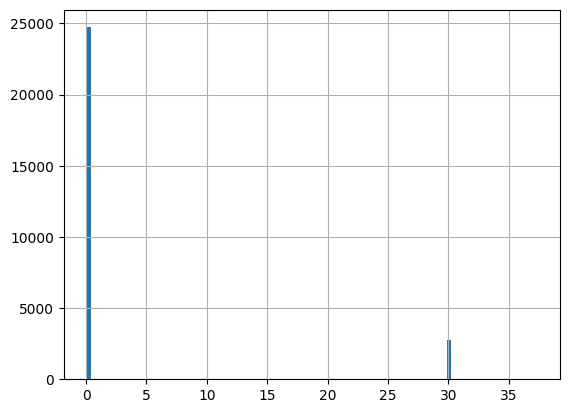

In [26]:
extra_json_data['iapf_duration'].hist(bins=100)

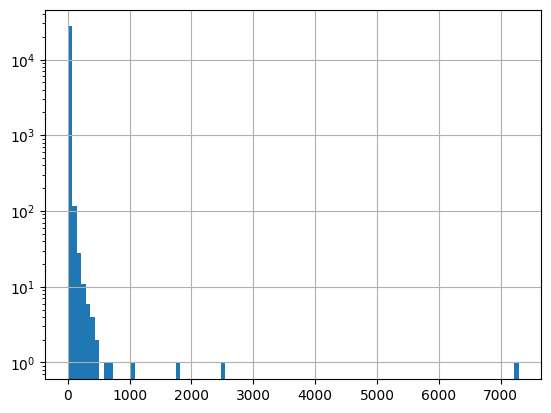

In [27]:
extra_json_data['baseline_duration'].hist(bins=100)
plt.yscale('log')

<Axes: >

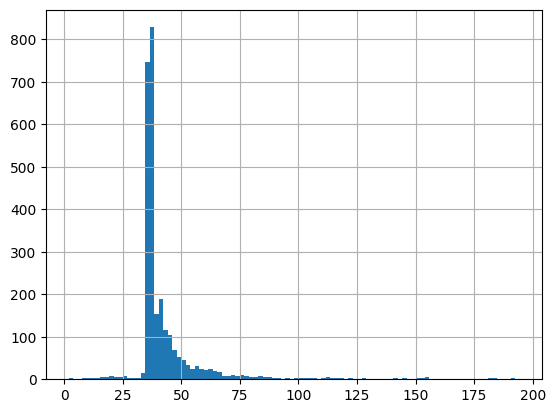

In [28]:
extra_json_data['baseline_duration'][(extra_json_data['baseline_duration'] > 1) & (extra_json_data['baseline_duration'] < 200)].hist(bins=100)
# plt.yscale('log')

In [29]:
full_data = pd.concat([full_data, extra_json_data], axis=1)
full_data

,filename_h5,download_url_key_h5,session_id,time_h5,filename_json,download_url_key_json,time_json,startTime,endTime,meta.data,...,calibrationbaseline_start_time,len_artifacts_0,min_artifacts_0,max_artifacts_0,len_artifacts_1,min_artifacts_1,max_artifacts_1,has_artifacts,iapf_duration,baseline_duration
0,link-ca06e399-55bc-4fe1-b6b0-50a905841dab--b72...,ca06e399-55bc-4fe1-b6b0-50a905841dab,b72791f8-d82e-4c5d-841f-da13636665f7,2023-09-16 09:52:33.280,link-7268bba9-4103-4f5b-86b6-640b03a9283a--b72...,7268bba9-4103-4f5b-86b6-640b03a9283a,2023-09-16 09:52:33.280,2023-09-16 09:50:32.169,2023-09-16 09:51:03.825,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,2023-09-16 09:50:32.939433,0.0,NaT,NaT,0.0,NaT,NaT,False,0.000006,0.000004
1,link-2de18b01-768b-46fc-bb50-30639548647f--2fa...,2de18b01-768b-46fc-bb50-30639548647f,2fa59df1-296c-4d5d-beda-3ea2210ad7ab,2024-01-23 15:32:56.960,link-a5e76d22-c871-43f5-b75f-531190dac15a--2fa...,a5e76d22-c871-43f5-b75f-531190dac15a,2024-01-23 15:32:56.960,2024-01-23 12:33:15.699,2024-01-23 12:48:02.856,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,2024-01-23 12:33:56.491719,12426.0,2024-01-23 12:34:06.163269,2024-01-23 12:48:02.911357,9594.0,2024-01-23 12:34:06.426965,2024-01-23 12:48:02.911357,True,30.031432,50.299930
2,link-005483aa-58a8-4f26-a45c-0fa28e676dd2--017...,005483aa-58a8-4f26-a45c-0fa28e676dd2,0177de9c-e483-4093-ab6a-ad7439f40904,2023-10-22 20:01:00.928,link-29cc5bc7-a121-47da-8101-39fafef82af2--017...,29cc5bc7-a121-47da-8101-39fafef82af2,2023-10-22 20:01:00.928,2023-10-22 19:39:12.813,2023-10-22 20:00:54.669,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,2023-10-22 19:39:12.654651,0.0,NaT,NaT,0.0,NaT,NaT,False,0.000114,0.000006
3,link-531e1916-1a51-41aa-86d6-0512dc386821--92f...,531e1916-1a51-41aa-86d6-0512dc386821,92fb232f-06d5-47f7-b22d-8d5710efee68,2024-01-19 10:09:01.440,link-2cf58b8a-c370-4fa4-a4b6-33981638435b--92f...,2cf58b8a-c370-4fa4-a4b6-33981638435b,2024-01-19 10:09:01.440,2024-01-19 10:06:28.991,2024-01-19 10:06:59.964,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,2024-01-19 10:06:28.974128,0.0,NaT,NaT,0.0,NaT,NaT,False,0.000011,0.000005
4,link-342ce789-4359-4b82-8e86-4555dbb4ed1f--e5b...,342ce789-4359-4b82-8e86-4555dbb4ed1f,e5b6d834-26cb-4020-ad50-ff8380593d3d,2024-01-09 19:16:53.888,link-de32bb5a-ba0e-4b14-b215-f5a83a572586--e5b...,de32bb5a-ba0e-4b14-b215-f5a83a572586,2024-01-09 19:19:04.960,2024-01-03 17:30:14.370,2024-01-03 19:39:36.163,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,2024-01-03 17:30:14.728363,0.0,NaT,NaT,0.0,NaT,NaT,False,0.000020,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28802,link-d67dba96-0184-4c92-86ca-36b77799461a--f74...,d67dba96-0184-4c92-86ca-36b77799461a,f74158d7-1730-4b9b-aba0-bf0d410a91aa,2023-12-18 17:38:29.504,link-9660ec4a-3d7f-427c-8155-ac6bec1e2d98--f74...,9660ec4a-3d7f-427c-8155-ac6bec1e2d98,2023-12-18 17:40:40.576,2023-12-18 17:25:45.942,2023-12-18 17:36:12.536,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,2023-12-18 17:25:45.631651,0.0,NaT,NaT,0.0,NaT,NaT,False,0.000064,0.000009
28803,link-2d2debd2-36e1-4e2b-be53-cdcb73fc4835--963...,2d2debd2-36e1-4e2b-be53-cdcb73fc4835,96342374-b24a-4262-b952-f2894933353e,2023-11-15 17:12:07.424,link-03075e29-fa0f-40fc-8c37-eb0a2345af36--963...,03075e29-fa0f-40fc-8c37-eb0a2345af36,2023-11-15 17:12:07.424,2023-11-15 16:57:28.740,2023-11-15 17:12:08.197,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,2023-11-15 16:57:29.013306,0.0,NaT,NaT,0.0,NaT,NaT,False,0.000026,0.000003
28804,link-ebbd8438-4ea6-4e95-9a05-18fedbbee5ac--cbc...,ebbd8438-4ea6-4e95-9a05-18fedbbee5ac,cbc913d7-05fd-47ec-a879-85a4078c5983,2023-09-30 17:23:37.600,link-d9c540a2-b0da-4644-84a3-6d6bd89fecd7--cbc...,d9c540a2-b0da-4644-84a3-6d6bd89fecd7,2023-09-30 17:25:48.672,2023-09-30 17:17:03.447,2023-09-30 17:21:54.476,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",

In [30]:
print("Hours of data where no artifacts")
(full_data['endTime'] - full_data['startTime']).apply(lambda x: x.total_seconds()).to_numpy()[~full_data['has_artifacts']].sum() / 3600

Hours of data where no artifacts


14831.552829722223

# Investigate time

h5 - end total:   28807 plotted 22880
json - end total: 28807 plotted 22209


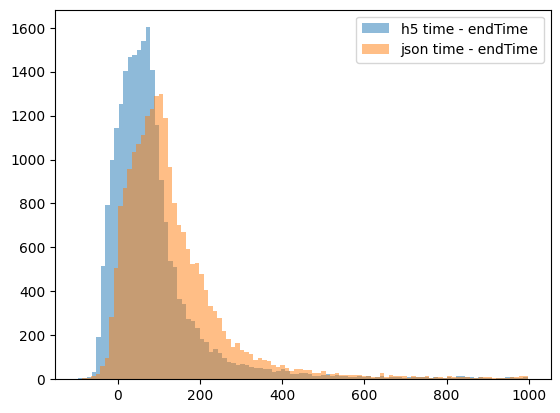

In [31]:
import matplotlib.pyplot as plt

h5_end = (full_data['time_h5'] - full_data['endTime']).apply(lambda x: x.total_seconds()).to_numpy()
json_end = (full_data['time_json'] - full_data['endTime']).apply(lambda x: x.total_seconds()).to_numpy()

print(f"h5 - end total:   {h5_end.shape[0]} plotted {((h5_end < 1000) & (h5_end > -100)).sum()}")
print(f"json - end total: {json_end.shape[0]} plotted {((json_end < 1000) & (json_end > -100)).sum()}")


plt.hist(h5_end[(h5_end < 1000) & (h5_end > -100)], bins=100, alpha=0.5, label='h5 time - endTime')
plt.hist(json_end[(json_end < 1000) & (json_end > -100)], bins=100, alpha=0.5, label='json time - endTime')
plt.legend()
None

In [32]:
start_end = (full_data['endTime'] - full_data['startTime']).apply(lambda x: x.total_seconds()).to_numpy()
print("endTime - startTime")
print("total:", len(start_end))
print("negative:", sum(start_end < 0))
print("from 25s to 35s:", ((25 < start_end) & (start_end < 35)).sum())
print("from 80s to 110s:", ((80 < start_end) & (start_end < 110)).sum())
print("1h+:", (start_end > 60 * 60).sum())

endTime - startTime
total: 28807
negative: 0
from 25s to 35s: 7295
from 80s to 110s: 2104
1h+: 4962


Text(0.5, 1.0, '25s to 35s')

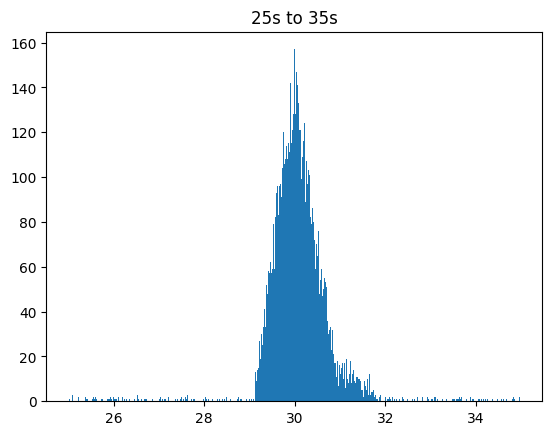

In [33]:
plt.hist(start_end[(start_end > 25) & (start_end < 35)], bins=500)
plt.title('25s to 35s')

Text(0.5, 1.0, '0 to 5 min')

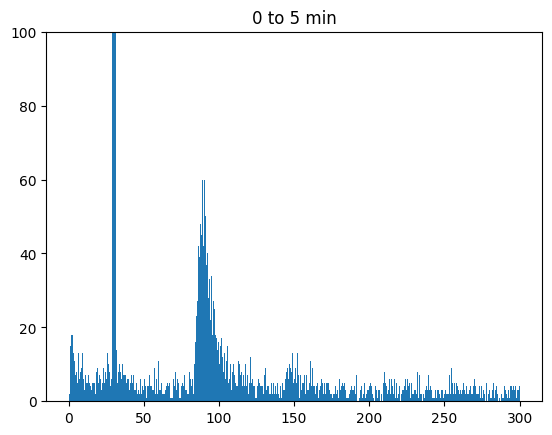

In [34]:
plt.hist(start_end[(start_end > 0) & (start_end < 300)], bins=1000)
ax = plt.gca()
ax.set_ylim([0, 100])
plt.title('0 to 5 min')


Text(0.5, 1.0, '0 to 2h')

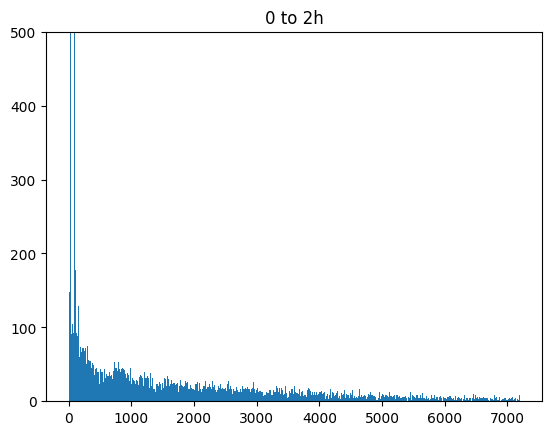

In [35]:
plt.hist(start_end[(start_end > 0) & (start_end < 60 * 120)], bins=1000)
ax = plt.gca()
ax.set_ylim([0, 500])
plt.title('0 to 2h')

In [36]:
t = [   
    ('total', start_end > 0),
    ('<35s', start_end < 35),
    ('35s to 5min', (35 <= start_end) & (start_end < 300)),
    ('5min to 30min', (300 <= start_end) & (start_end < 60 * 30)),
    ('30min to 1h', (60 * 30 <= start_end) & (start_end < 3600)),
    ('1h to 2h', (3600 <= start_end) & (start_end < 3600 * 2)),
    ('2h+', 3600 * 2 <= start_end)
]

for name, mask in t:
    time = sum(start_end[mask])
    cnt = sum(mask)
    print(f"{name: >15}: {time:_.0f}s {time / 3600 :_.0f}h sessions: {cnt} \t\t| {time / sum(start_end) * 100:.2f}% of time, {cnt / start_end.shape[0] * 100:.2f}% of number of sessions")


          total: 62_544_135s 17_373h sessions: 28807 		| 100.00% of time, 100.00% of number of sessions
           <35s: 225_475s 63h sessions: 7894 		| 0.36% of time, 27.40% of number of sessions
    35s to 5min: 661_833s 184h sessions: 5015 		| 1.06% of time, 17.41% of number of sessions
  5min to 30min: 6_525_727s 1_813h sessions: 6854 		| 10.43% of time, 23.79% of number of sessions
    30min to 1h: 10_632_471s 2_953h sessions: 4082 		| 17.00% of time, 14.17% of number of sessions
       1h to 2h: 15_817_993s 4_394h sessions: 3155 		| 25.29% of time, 10.95% of number of sessions
            2h+: 28_680_637s 7_967h sessions: 1807 		| 45.86% of time, 6.27% of number of sessions


# investigate other

In [37]:
def flatten_data(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            name = name[:-1].lower().replace(' ', '_')
            out[name] = '_'.join(x)
        else:
            name = name[:-1].lower().replace(' ', '_')
            out[name] = x

    flatten(y)
    return out

get_flat_meta = lambda x: flatten_data(json.loads(x['meta.data']))

meta_df = full_data[['meta.data']].apply(get_flat_meta, axis=1, result_type='expand')
meta_df['sessioninfo_startutcunixtimestamp'] = pd.to_datetime(meta_df['sessioninfo_startutcunixtimestamp'], unit='us')
meta_df['sessioninfo_endutcunixtimestamp'] = pd.to_datetime(meta_df['sessioninfo_endutcunixtimestamp'], unit='us')
meta_df

,appinfo_clientname,appinfo_clientversion,appinfo_operatingsystem,appinfo_processid,capsuleinfo_version,deviceinfo_channelnames,deviceinfo_description_actual_name,deviceinfo_description_address,deviceinfo_description_battery_charge,deviceinfo_description_firmware_version,...,deviceinfo_devicetype,deviceinfo_numchannels,deviceinfo_samplerate,sessioninfo_capsulesessionid,sessioninfo_endutcunixtimestamp,sessioninfo_nfbfunctions,sessioninfo_startutcunixtimestamp,appinfo_name,appinfo_processname,deviceinfo_description
0,unknown,v0.4.6-c8123a80e (Release - 2023-07-26T15:09:36Z),macOS,11918,v0.4.6 (Release - 2023-07-26T15:09:36Z),O1_T3_T4_O2,Headband,810705,49.0,4.6.0,...,0,4,250,b72791f8-d82e-4c5d-841f-da13636665f7,2023-09-16 09:51:03.004637,alpha_beta_theta,2023-09-16 09:50:32.912169,NaN,NaN,NaN
1,unknown,1.6.5,Windows,15004,v1.0.0-a099a68f (Release - 2023-12-20T13:14:24Z),O1_T3_T4_O2,Headband,820136,93.0,4.6.1,...,0,4,250,2fa59df1-296c-4d5d-beda-3ea2210ad7ab,2024-01-23 12:48:02.975238,alpha_beta_theta,2024-01-23 12:33:15.185369,NaN,NaN,NaN
2,unknown,v0.4.6-c8123a80 (Release - 2023-07-26T16:22:38Z),Windows,17256,v0.4.6 (Release - 2023-07-26T16:22:38Z),O1_T3_T4_O2,Headband,810660,100.0,4.6.2,...,0,4,250,0177de9c-e483-4093-ab6a-ad7439f40904,2023-10-22 20:00:54.935536,alpha_beta_theta,2023-10-22 19:39:12.609281,NaN,NaN,NaN
3,unknown,v0.4.6-c8123a80e (Release - 2023-07-26T15:09:36Z),macOS,19994,v0.4.6 (Release - 2023-07-26T15:09:36Z),A1_T5_T6_A2,Headphones,830316,92.0,4.6.3,...,2,4,250,92fb232f-06d5-47f7-b22d-8d5710efee68,2024-01-19 10:06:59.012115,alpha_beta_theta,2024-01-19 10:06:28.952991,NaN,NaN,NaN
4,unknown,v0.4.6-c8123a80 (Release - 2023-07-26T16:22:38Z),Windows,23484,v0.4.6 (Release - 2023-07-26T16:22:38Z),O1_T3_T4_O2,Headband,820286,89.0,4.6.3,...,0,4,250,e5b6d834-26cb-4020-ad50-ff8380593d3d,2024-01-03 19:39:36.990068,alpha_beta_theta,2024-01-03 17:30:14.710837,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28802,unknown,v0.4.6-c8123a80 (Release - 2023-07-26T16:22:38Z),Windows,1336,v0.4.6 (Release - 2023-07-26T16:22:38Z),A1_T5_T6_A2,Headphone,830278,100.0,4.6.3,...,2,4,250,f74158d7-1730-4b9b-aba0-bf0d410a91aa,2023-12-18 17:36:12.211396,alpha_beta_theta,2023-12-18 17:25:45.598394,NaN,NaN,NaN
28803,unknown,v0.4.6-c8123a80 (Release - 2023-07-26T16:22:38Z),Windows,30888,v0.4.6 (Release - 2023-07-26T16:22:38Z),O1_T3_T4_O2,Headband,810848,46.0,4.6.2,...,0,4,250,96342374-b24a-4262-b952-f2894933353e,2023-11-15 17:12:08.211905,alpha_beta_theta,2023-11-15 16:57:28.995474,NaN,NaN,NaN
28804,unknown,v0.4.6-c8123a80 (Release - 2023-07-26T16:22:38Z),Windows,18400,v0.4.6 (Release - 2023-07-26T16:22:38Z),O1_T3_T4_O2,Headband,810300,73.0,2.23.0,...,0,4,250,cbc913d7-05fd-47ec-a879-85a4078c5983,2023-09-30 17:21:54.181692,alpha_beta_theta,2023-09-30 17:17:03.467944,NaN,NaN,NaN
28805,unknown,v0.3.60-3a0b01337 (Release - 2023-07-12T13:42:...,macOS,9917,v0.3.60 (Release - 2023-07-12T13:42:53Z),O1_T3_T4_O2,Headband,810517,98.0,4.4.0,...,0,4,250,c44d9f80-f3ec-4172-8717-dce418996a13,2023-07-25 11:09:16.163969,alpha_beta_theta,2023-07-25 09:32:37.254631,NaN,NaN,NaN


In [38]:
print('unique values per column:')
for col in meta_df.columns:
    print(f"{col:>40}: {len(meta_df[col].unique())} {meta_df[col].unique().tolist()[:6]}")

unique values per column:
                      appinfo_clientname: 4 ['unknown', 'Mind Tracker BCI', nan, 'bci']
                   appinfo_clientversion: 43 ['v0.4.6-c8123a80e (Release - 2023-07-26T15:09:36Z)', '1.6.5', 'v0.4.6-c8123a80 (Release - 2023-07-26T16:22:38Z)', '1.6.6', 'v0.3.22-119de857 (Release - May 26 2023 13:56:05)', 'v0.3.60-3a0b01337 (Release - 2023-07-11T15:01:12Z)']
                 appinfo_operatingsystem: 4 ['macOS', 'Windows', 'iOS', nan]
                       appinfo_processid: 9302 [11918, 15004, 17256, 19994, 23484, 39332]
                     capsuleinfo_version: 36 ['v0.4.6 (Release - 2023-07-26T15:09:36Z)', 'v1.0.0-a099a68f (Release - 2023-12-20T13:14:24Z)', 'v0.4.6 (Release - 2023-07-26T16:22:38Z)', 'v1.0.0-51da90f49 (Release - 2023-12-25T14:22:09Z)', 'v0.3.22 (Release - May 26 2023 13:54:08)', 'v0.3.60 (Release - 2023-07-11T15:01:12Z)']
                 deviceinfo_channelnames: 3 ['O1_T3_T4_O2', 'A1_T5_T6_A2', 'A1_C3_C4_A2']
      deviceinfo_description

In [39]:
meta_df.drop(columns=['sessioninfo_nfbfunctions', 'appinfo_name', 'deviceinfo_numchannels', 'deviceinfo_samplerate'], inplace=True)

In [40]:
relevant_meta_df = meta_df[(meta_df['deviceinfo_channelnames'] == 'O1_T3_T4_O2') & (meta_df['deviceinfo_devicetype'] == 103)]
print('unique values per column:')
for col in relevant_meta_df.columns:
    print(f"{col:>40}: {len(relevant_meta_df[col].unique())} {relevant_meta_df[col].unique().tolist()[:6]}")


unique values per column:
                      appinfo_clientname: 1 ['unknown']
                   appinfo_clientversion: 6 ['v0.4.6-c8123a80 (Release - 2023-07-26T16:22:38Z)', 'v0.6.42-d91017d6 (Release - 2023-10-26T18:46:24Z)', 'v0.3.60-3a0b01337 (Debug - 2023-07-11T22:22:05Z)', 'v0.4.5-c8123a80 (Debug - 2023-07-25T13:43:43Z)', 'v0.3.60-3a0b01337 (Release - 2023-07-11T17:26:32Z)', 'v0.3.60-3a0b0133 (Release - 2023-07-26T12:52:48Z)']
                 appinfo_operatingsystem: 2 ['Windows', 'macOS']
                       appinfo_processid: 15 [7952, 4632, 8084, 42233, 5967, 3912]
                     capsuleinfo_version: 6 ['v0.4.6 (Release - 2023-07-26T16:22:38Z)', 'v0.6.42 (Release - 2023-10-26T18:46:24Z)', 'v0.3.60 (Debug - 2023-07-11T22:22:05Z)', 'v0.4.5 (Debug - 2023-07-25T13:43:43Z)', 'v0.3.60 (Release - 2023-07-11T17:26:32Z)', 'v0.3.60 (Release - 2023-07-26T12:52:48Z)']
                 deviceinfo_channelnames: 1 ['O1_T3_T4_O2']
      deviceinfo_description_actual_name: 1 [nan

In [41]:
meta_df['relevant_device'] = (meta_df['deviceinfo_channelnames'] == 'O1_T3_T4_O2') & (meta_df['deviceinfo_devicetype'] == 0) & (meta_df['deviceinfo_description_actual_name'] == 'Headband')
relevant_meta_df = meta_df[meta_df['relevant_device']]
print('unique values per column:')
for col in relevant_meta_df.columns:
    print(f"{col:>40}: {len(relevant_meta_df[col].unique())} {relevant_meta_df[col].unique().tolist()[:6]}")

unique values per column:
                      appinfo_clientname: 3 ['unknown', 'Mind Tracker BCI', 'bci']
                   appinfo_clientversion: 32 ['v0.4.6-c8123a80e (Release - 2023-07-26T15:09:36Z)', '1.6.5', 'v0.4.6-c8123a80 (Release - 2023-07-26T16:22:38Z)', '1.6.6', 'v0.3.60-3a0b01337 (Release - 2023-07-26T15:51:59Z)', 'v0.3.60-3a0b01337 (Release - 2023-07-12T13:42:53Z)']
                 appinfo_operatingsystem: 3 ['macOS', 'Windows', 'iOS']
                       appinfo_processid: 7858 [11918, 15004, 17256, 23484, 39332, 3624]
                     capsuleinfo_version: 25 ['v0.4.6 (Release - 2023-07-26T15:09:36Z)', 'v1.0.0-a099a68f (Release - 2023-12-20T13:14:24Z)', 'v0.4.6 (Release - 2023-07-26T16:22:38Z)', 'v1.0.0-51da90f49 (Release - 2023-12-25T14:22:09Z)', 'v0.3.60 (Release - 2023-07-26T15:51:59Z)', 'v0.3.60 (Release - 2023-07-12T13:42:53Z)']
                 deviceinfo_channelnames: 1 ['O1_T3_T4_O2']
      deviceinfo_description_actual_name: 1 ['Headband']
          d

In [42]:
full_data = pd.concat([full_data, meta_df], axis=1)
full_data

,filename_h5,download_url_key_h5,session_id,time_h5,filename_json,download_url_key_json,time_json,startTime,endTime,meta.data,...,deviceinfo_description_firmware_version,deviceinfo_description_is_connected,deviceinfo_description_serial,deviceinfo_devicetype,sessioninfo_capsulesessionid,sessioninfo_endutcunixtimestamp,sessioninfo_startutcunixtimestamp,appinfo_processname,deviceinfo_description,relevant_device
0,link-ca06e399-55bc-4fe1-b6b0-50a905841dab--b72...,ca06e399-55bc-4fe1-b6b0-50a905841dab,b72791f8-d82e-4c5d-841f-da13636665f7,2023-09-16 09:52:33.280,link-7268bba9-4103-4f5b-86b6-640b03a9283a--b72...,7268bba9-4103-4f5b-86b6-640b03a9283a,2023-09-16 09:52:33.280,2023-09-16 09:50:32.169,2023-09-16 09:51:03.825,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,4.6.0,True,810705,0,b72791f8-d82e-4c5d-841f-da13636665f7,2023-09-16 09:51:03.004637,2023-09-16 09:50:32.912169,NaN,NaN,True
1,link-2de18b01-768b-46fc-bb50-30639548647f--2fa...,2de18b01-768b-46fc-bb50-30639548647f,2fa59df1-296c-4d5d-beda-3ea2210ad7ab,2024-01-23 15:32:56.960,link-a5e76d22-c871-43f5-b75f-531190dac15a--2fa...,a5e76d22-c871-43f5-b75f-531190dac15a,2024-01-23 15:32:56.960,2024-01-23 12:33:15.699,2024-01-23 12:48:02.856,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,4.6.1,True,820136,0,2fa59df1-296c-4d5d-beda-3ea2210ad7ab,2024-01-23 12:48:02.975238,2024-01-23 12:33:15.185369,NaN,NaN,True
2,link-005483aa-58a8-4f26-a45c-0fa28e676dd2--017...,005483aa-58a8-4f26-a45c-0fa28e676dd2,0177de9c-e483-4093-ab6a-ad7439f40904,2023-10-22 20:01:00.928,link-29cc5bc7-a121-47da-8101-39fafef82af2--017...,29cc5bc7-a121-47da-8101-39fafef82af2,2023-10-22 20:01:00.928,2023-10-22 19:39:12.813,2023-10-22 20:00:54.669,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,4.6.2,True,810660,0,0177de9c-e483-4093-ab6a-ad7439f40904,2023-10-22 20:00:54.935536,2023-10-22 19:39:12.609281,NaN,NaN,True
3,link-531e1916-1a51-41aa-86d6-0512dc386821--92f...,531e1916-1a51-41aa-86d6-0512dc386821,92fb232f-06d5-47f7-b22d-8d5710efee68,2024-01-19 10:09:01.440,link-2cf58b8a-c370-4fa4-a4b6-33981638435b--92f...,2cf58b8a-c370-4fa4-a4b6-33981638435b,2024-01-19 10:09:01.440,2024-01-19 10:06:28.991,2024-01-19 10:06:59.964,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,4.6.3,True,830316,2,92fb232f-06d5-47f7-b22d-8d5710efee68,2024-01-19 10:06:59.012115,2024-01-19 10:06:28.952991,NaN,NaN,False
4,link-342ce789-4359-4b82-8e86-4555dbb4ed1f--e5b...,342ce789-4359-4b82-8e86-4555dbb4ed1f,e5b6d834-26cb-4020-ad50-ff8380593d3d,2024-01-09 19:16:53.888,link-de32bb5a-ba0e-4b14-b215-f5a83a572586--e5b...,de32bb5a-ba0e-4b14-b215-f5a83a572586,2024-01-09 19:19:04.960,2024-01-03 17:30:14.370,2024-01-03 19:39:36.163,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,4.6.3,True,820286,0,e5b6d834-26cb-4020-ad50-ff8380593d3d,2024-01-03 19:39:36.990068,2024-01-03 17:30:14.710837,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28802,link-d67dba96-0184-4c92-86ca-36b77799461a--f74...,d67dba96-0184-4c92-86ca-36b77799461a,f74158d7-1730-4b9b-aba0-bf0d410a91aa,2023-12-18 17:38:29.504,link-9660ec4a-3d7f-427c-8155-ac6bec1e2d98--f74...,9660ec4a-3d7f-427c-8155-ac6bec1e2d98,2023-12-18 17:40:40.576,2023-12-18 17:25:45.942,2023-12-18 17:36:12.536,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,4.6.3,True,830278,2,f74158d7-1730-4b9b-aba0-bf0d410a91aa,2023-12-18 17:36:12.211396,2023-12-18 17:25:45.598394,NaN,NaN,False
28803,link-2d2debd2-36e1-4e2b-be53-cdcb73fc4835--963...,2d2debd2-36e1-4e2b-be53-cdcb73fc4835,96342374-b24a-4262-b952-f2894933353e,2023-11-15 17:12:07.424,link-03075e29-fa0f-40fc-8c37-eb0a2345af36--963...,03075e29-fa0f-40fc-8c37-eb0a2345af36,2023-11-15 17:12:07.424,2023-11-15 16:57:28.740,2023-11-15 17:12:08.197,"{""appInfo"":{""clientName"":""unknown"",""clientVers...",...,4.6.2,False,810848,0,96342374-b24a-4262-b952-f2894933353e,2023-11-15 17:12:08.211905,2023-11-15 16:57:28.995474,NaN,NaN,True
28804,link-ebbd84

<Axes: >

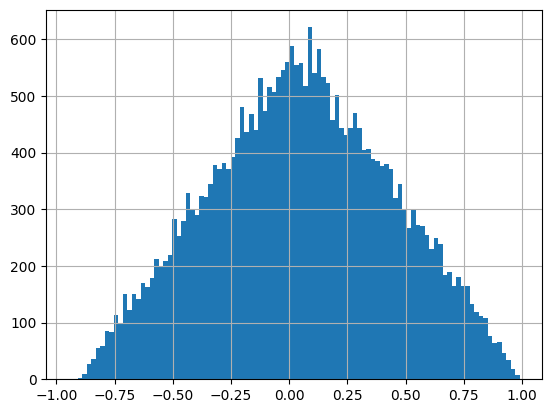

In [64]:
(full_data['startTime'] - full_data['sessioninfo_startutcunixtimestamp']).apply(lambda x: x.total_seconds()).hist(bins=100)

<Axes: >

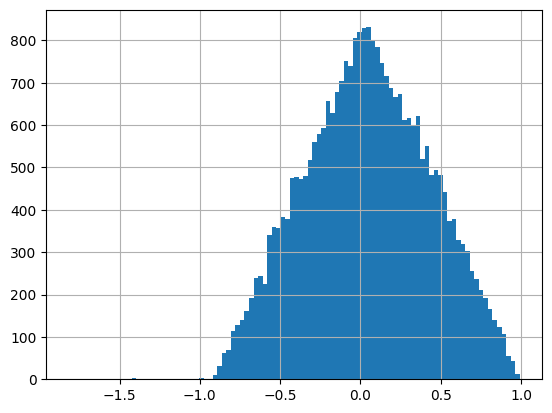

In [66]:
tmp = (full_data['endTime'] - full_data['sessioninfo_endutcunixtimestamp']).apply(lambda x: x.total_seconds())

tmp = tmp[tmp > -2]
tmp.hist(bins=100)
# plt.yscale('log')


In [91]:
(full_data['calibrationiapf_start_time'] > full_data['calibrationbaseline_start_time']).sum()

24731

<Axes: >

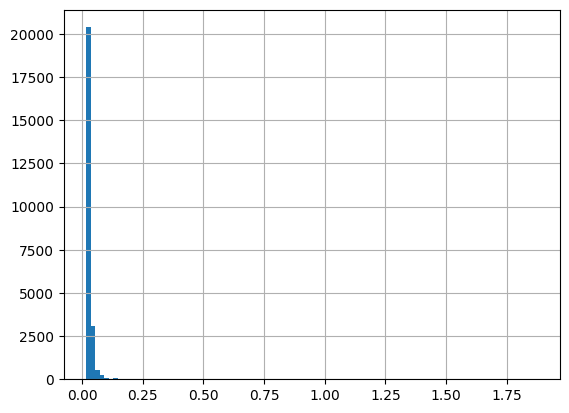

In [103]:
tmp = (full_data['calibrationbaseline_start_time'] - full_data['sessioninfo_startutcunixtimestamp']).apply(lambda x: x.total_seconds())
tmp[tmp < 2].hist(bins=100)

<Axes: >

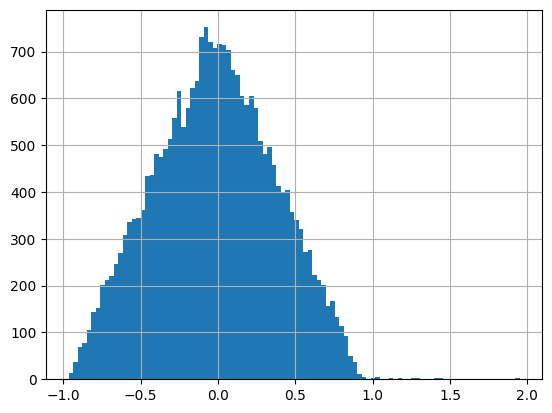

In [104]:
tmp = (full_data['calibrationbaseline_start_time'] - full_data['startTime']).apply(lambda x: x.total_seconds())
tmp[tmp < 2].hist(bins=100)

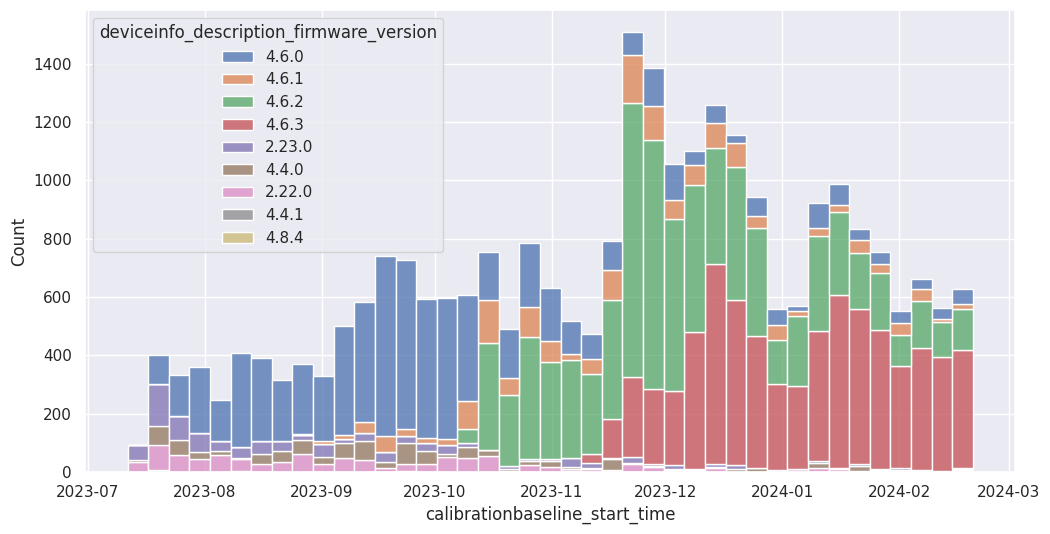

In [124]:
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(12,6)})

gfg = sns.histplot(data=full_data, x='calibrationbaseline_start_time', hue='deviceinfo_description_firmware_version', multiple="stack")
# plt.setp(gfg.get_legend().get_texts(), fontsize='10')  

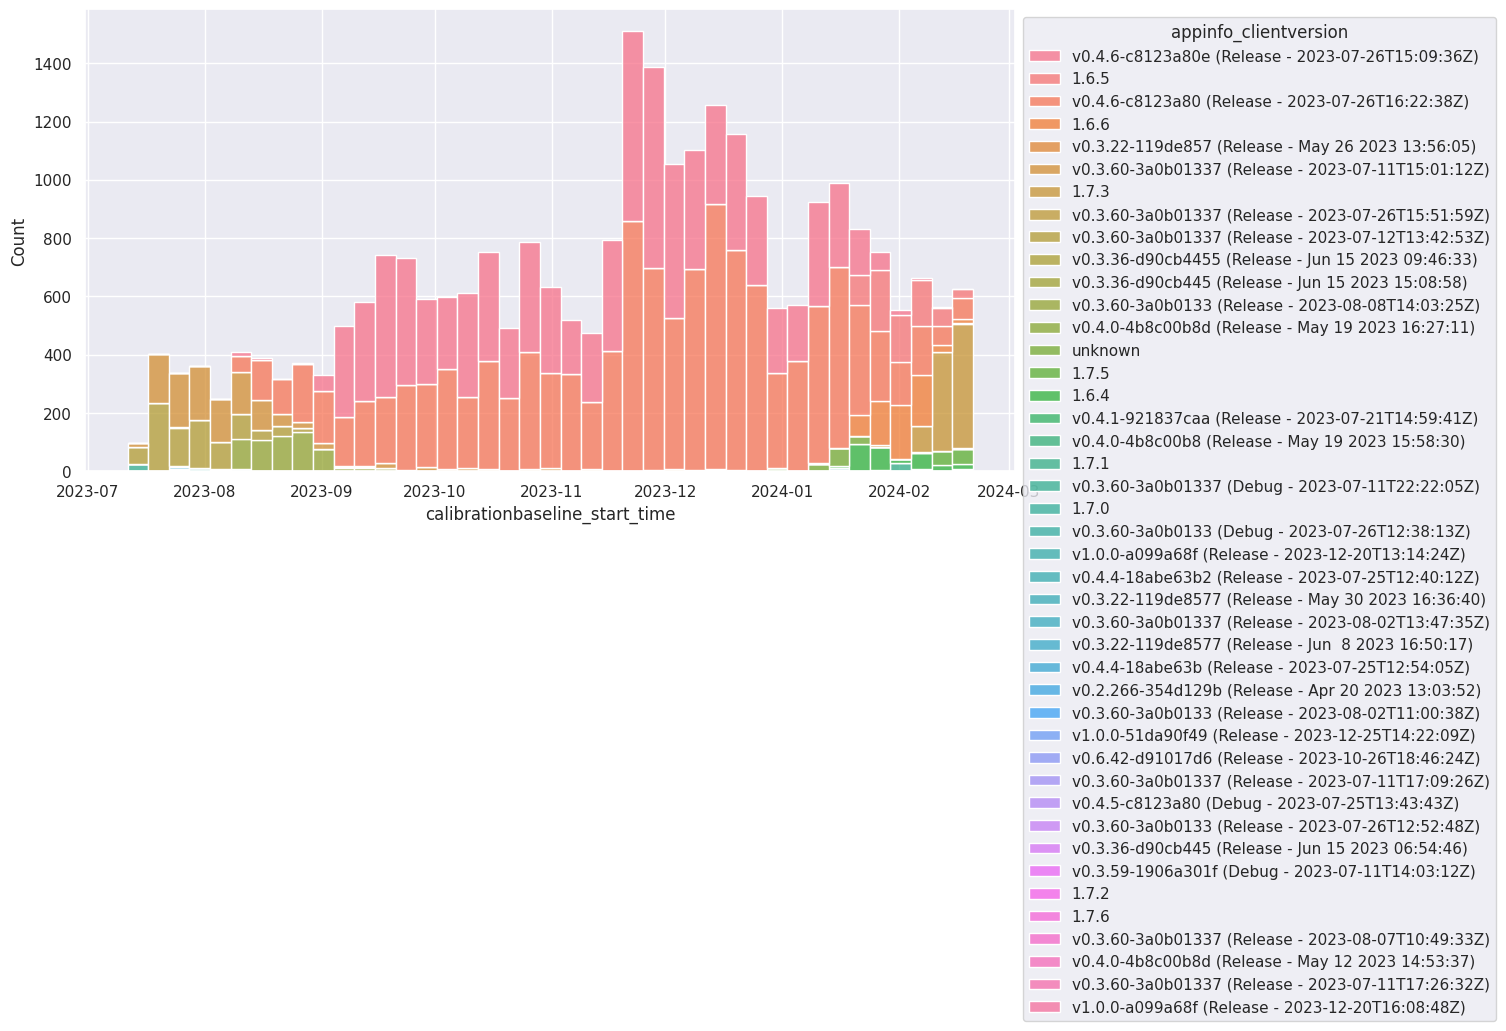

In [127]:
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(12,6)})

gfg = sns.histplot(data=full_data, x='calibrationbaseline_start_time', hue='appinfo_clientversion', multiple="stack")
sns.move_legend(gfg, "upper left", bbox_to_anchor=(1, 1))

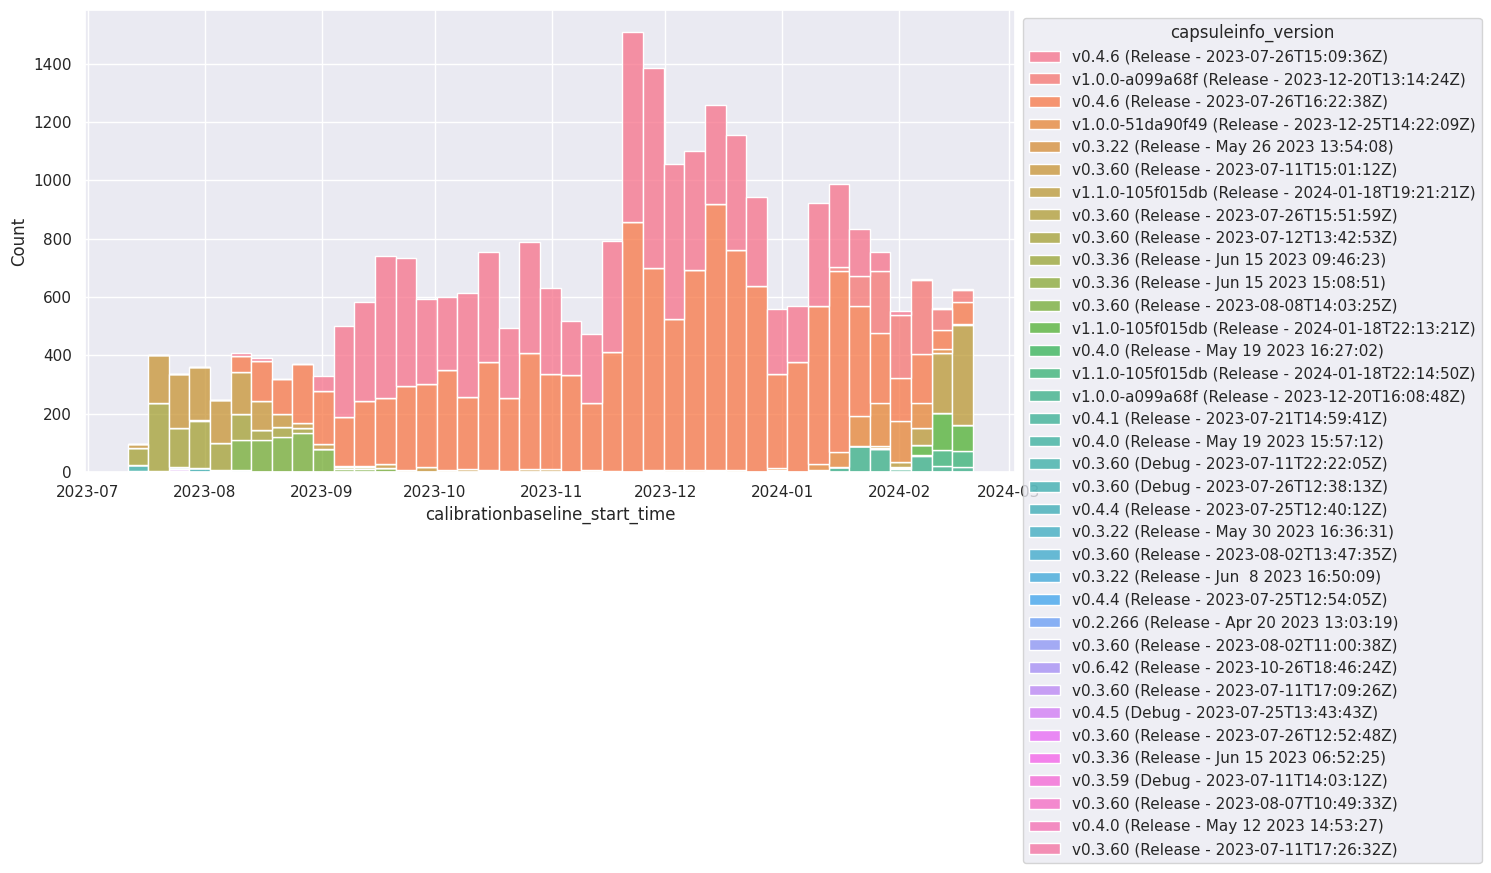

In [128]:
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(12,6)})

gfg = sns.histplot(data=full_data, x='calibrationbaseline_start_time', hue='capsuleinfo_version', multiple="stack")
sns.move_legend(gfg, "upper left", bbox_to_anchor=(1, 1))

<Axes: xlabel='capsuleinfo_version', ylabel='appinfo_clientversion'>

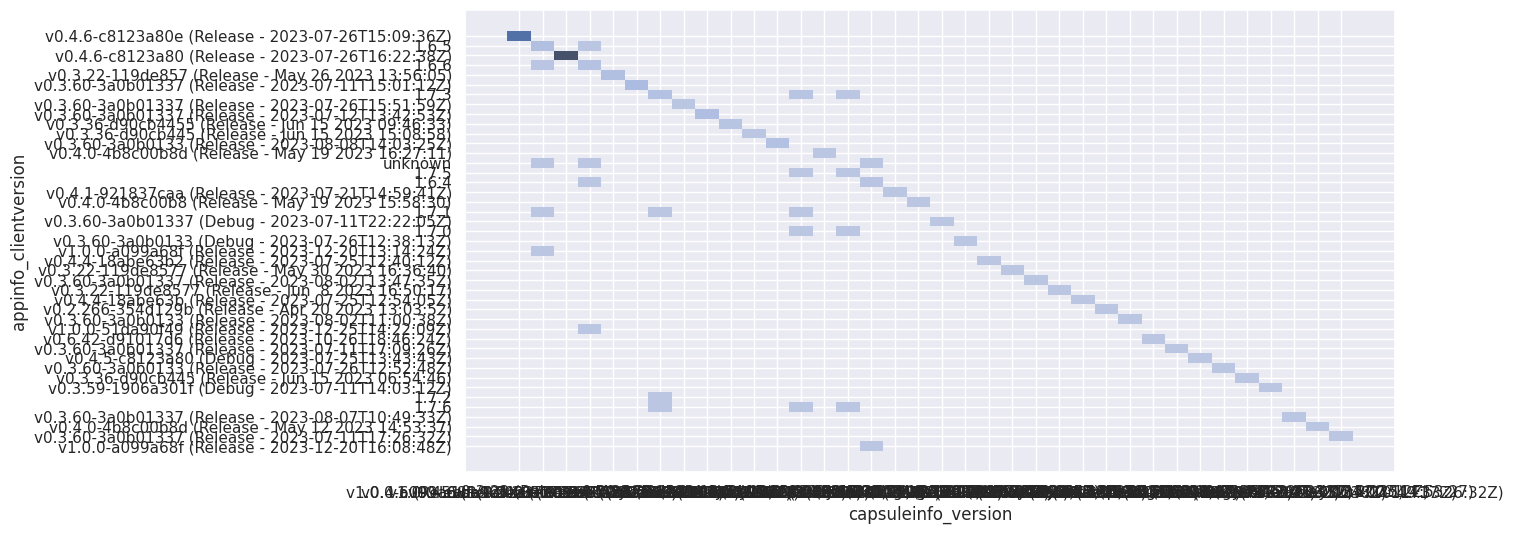

In [132]:
sns.histplot(data=full_data, x='capsuleinfo_version', y='appinfo_clientversion')

In [ ]:
# process id and user id

# Finally left

In [162]:
left = (~full_data['has_artifacts']) & \
    (full_data['deviceinfo_channelnames'] == 'O1_T3_T4_O2') & \
    (full_data['deviceinfo_devicetype'] == 0) & \
    (full_data['deviceinfo_description_actual_name'] == 'Headband')

export_data = full_data[left]
export_data['time_start'] = export_data['sessioninfo_startutcunixtimestamp'] 
export_data['time_end'] = export_data['sessioninfo_endutcunixtimestamp'] 
export_data['duration'] = (export_data['time_end'] - export_data['time_start']).apply(lambda x: x.total_seconds())
export_data.drop(columns=[
    'len_artifacts_0', 'min_artifacts_0', 'max_artifacts_0', 'len_artifacts_1', 'min_artifacts_1', 'max_artifacts_1',
    'appinfo_processname', 'deviceinfo_description', 'startTime', 'endTime', 'sessioninfo_startutcunixtimestamp', 'sessioninfo_startutcunixtimestamp'
], inplace=True)
export_data.dropna(inplace=True)
for col in export_data:
    print(f"{col:>40}: {len(export_data[col].unique())}")

                             filename_h5: 19576
                     download_url_key_h5: 19576
                              session_id: 19576
                                 time_h5: 16040
                           filename_json: 19576
                   download_url_key_json: 19576
                               time_json: 15780
                               meta.data: 19576
                calibrationiapf_end_time: 19576
              calibrationiapf_start_time: 19576
            calibrationbaseline_end_time: 19576
          calibrationbaseline_start_time: 19576
                           has_artifacts: 1
                           iapf_duration: 531
                       baseline_duration: 227
                      appinfo_clientname: 2
                   appinfo_clientversion: 27
                 appinfo_operatingsystem: 3
                       appinfo_processid: 6972
                     capsuleinfo_version: 24
                 deviceinfo_channelnames: 1
      deviceinfo_de

In [163]:
order = [
    'time_start',
    'calibrationbaseline_start_time',
    'calibrationbaseline_end_time',
    'calibrationiapf_start_time',
    'calibrationiapf_end_time',
    'time_end'
]

for a, b in zip(order[:-1], order[1:]):
    print(f'{a:>30} <= {b:>30} {(export_data[a] <= export_data[b]).sum()}')


                    time_start <= calibrationbaseline_start_time 19576
calibrationbaseline_start_time <=   calibrationbaseline_end_time 19576
  calibrationbaseline_end_time <=     calibrationiapf_start_time 19484
    calibrationiapf_start_time <=       calibrationiapf_end_time 19576
      calibrationiapf_end_time <=                       time_end 19576


In [164]:
export_data[['calibrationbaseline_end_time', 'calibrationiapf_start_time', 'baseline_duration', 'iapf_duration', 'duration']][export_data['calibrationbaseline_end_time'] > export_data['calibrationiapf_start_time']]

,calibrationbaseline_end_time,calibrationiapf_start_time,baseline_duration,iapf_duration,duration
224,2024-01-22 14:01:17.449599,2024-01-22 14:00:10.084215,37.287713,30.044417,78.635507
619,2024-02-01 12:05:47.809642,2024-02-01 12:05:05.404613,12.279111,30.107010,51.354254
689,2024-02-01 09:52:22.447415,2024-02-01 09:51:45.385708,6.911275,30.122703,46.025818
1069,2024-02-01 14:48:19.152081,2024-02-01 14:47:40.029165,9.011088,30.089318,48.102685
1075,2023-12-29 11:34:01.330856,2023-12-29 11:32:45.614814,45.680701,30.009930,81.666885
...,...,...,...,...,...
26108,2024-02-19 18:42:46.019236,2024-02-19 18:41:39.818087,36.119671,30.057976,160.818034
26330,2024-02-12 08:14:37.445638,2024-02-12 08:13:47.195200,20.215217,30.013123,59.244547
26493,2024-02-04 12:15:34.087604,2024-02-04 12:14:39.233090,24.739468,30.085304,63.571056
27338,2024-01-15 14:47:59.993807,2024-01-15 14:46:54.798974,35.170233,30.006469,226.673093


In [167]:
fix_calibration_overlap = (export_data['calibrationbaseline_end_time'] <= export_data['calibrationiapf_start_time'])
print(f"Deleting {(~fix_calibration_overlap).sum()} records where calibrationbaseline_end_time > calibrationiapf_start_time")
export_data = export_data[fix_calibration_overlap]

Deleting 92 records where calibrationbaseline_end_time > calibrationiapf_start_time


In [171]:
export_data['duration'].sum() / 3600

12375.92929092111

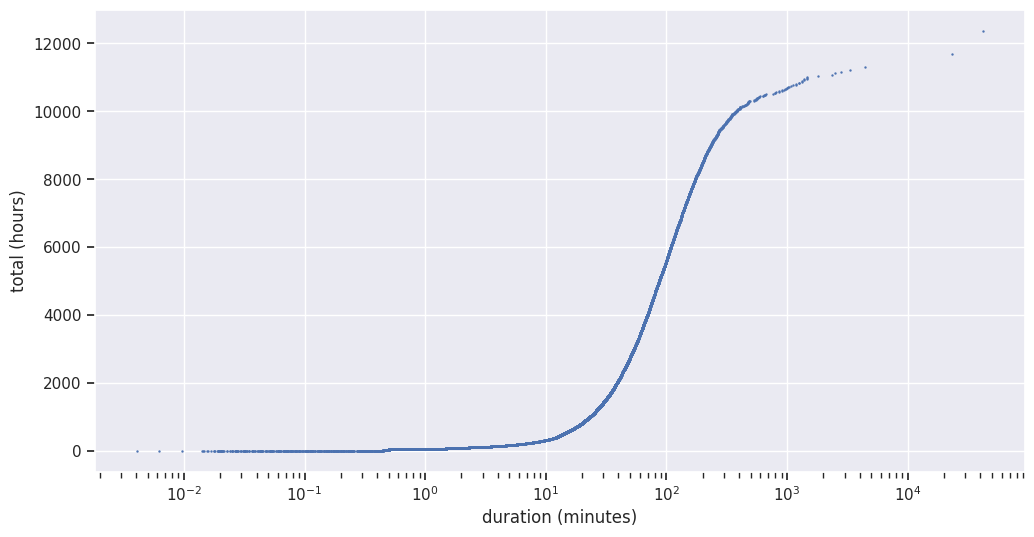

In [188]:
duration_sorted = export_data['duration'].sort_values()
duration_cumsum = duration_sorted.cumsum() / 3600

plt.xscale('log')
plt.xlabel('duration (minutes)')
plt.ylabel('total (hours)')
with sns.axes_style("whitegrid"):
    plt.scatter(duration_sorted / 60, duration_cumsum, s=0.5)
    
# main increase from 30 to 200 minutes (3h)

Text(0.5, 0, 'duration (minute)')

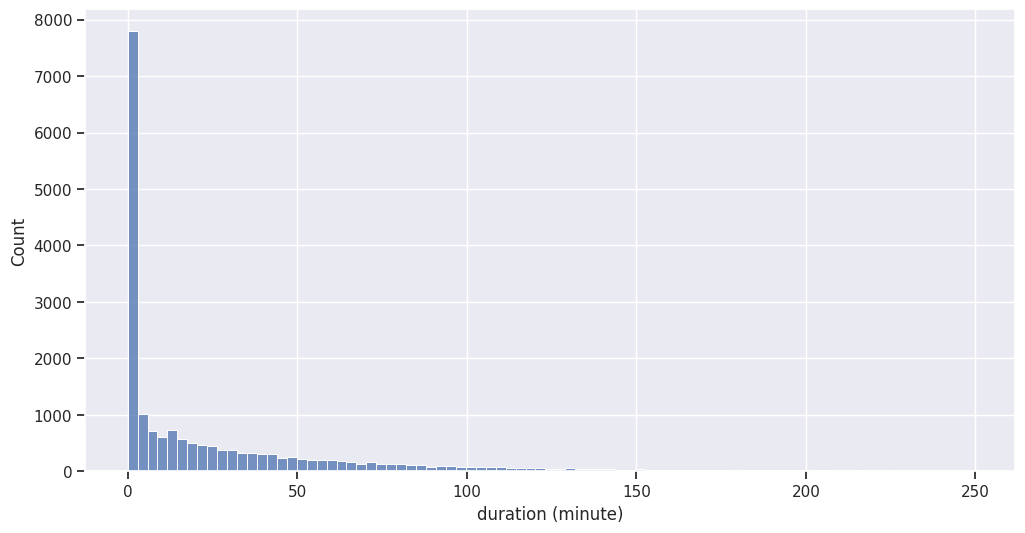

In [205]:
tmp = export_data['duration'] / 60
sns.histplot(x=tmp[tmp < 250])
plt.xlabel('duration (minute)')

In [218]:
tmp = export_data['duration'] / 60

print(f'                less 30m: {tmp[(tmp < 30)].sum() / 60} sessions: {tmp[(tmp < 30)].count()}')
print(f'30m to 4h total_duration: {tmp[(tmp > 30) & (tmp < 60 * 4)].sum() / 60} sessions: {tmp[(tmp > 30) & (tmp < 60 * 4)].count()}')
print(f'                     4h+: {tmp[(tmp > 240)].sum() / 60} sessions: {tmp[(tmp > 240)].count()}')

                less 30m: 1417.4422105569445 sessions: 13299
30m to 4h total_duration: 7652.807546249167 sessions: 5896
                     4h+: 3305.679534115 sessions: 289


In [222]:
export_data.to_parquet('clean_data.parquet')

# serial info

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

export_data = pd.read_parquet('clean_data.parquet')

In [7]:
export_data.columns

Index(['filename_h5', 'download_url_key_h5', 'session_id', 'time_h5',
       'filename_json', 'download_url_key_json', 'time_json', 'meta.data',
       'calibrationiapf_end_time', 'calibrationiapf_start_time',
       'calibrationbaseline_end_time', 'calibrationbaseline_start_time',
       'has_artifacts', 'iapf_duration', 'baseline_duration',
       'appinfo_clientname', 'appinfo_clientversion',
       'appinfo_operatingsystem', 'appinfo_processid', 'capsuleinfo_version',
       'deviceinfo_channelnames', 'deviceinfo_description_actual_name',
       'deviceinfo_description_address',
       'deviceinfo_description_battery_charge',
       'deviceinfo_description_firmware_version',
       'deviceinfo_description_is_connected', 'deviceinfo_description_serial',
       'deviceinfo_devicetype', 'sessioninfo_capsulesessionid',
       'sessioninfo_endutcunixtimestamp', 'relevant_device', 'time_start',
       'time_end', 'duration'],
      dtype='object')

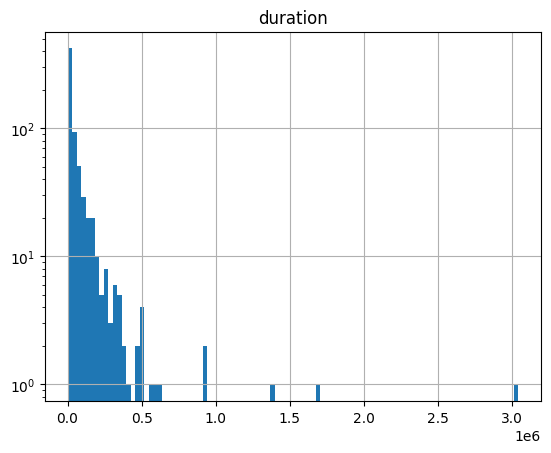

In [16]:
export_data.groupby(by='deviceinfo_description_serial').agg({'duration': 'sum', }).hist(bins=100)
plt.yscale('log')

In [26]:
total = export_data['duration'].sum()

(export_data.groupby(by='deviceinfo_description_serial').agg({'duration': 'sum'}).sort_values(by = 'duration', ascending=False)[:20] / total * 100).cumsum()


,duration
deviceinfo_description_serial,
810468,6.837251
810774,10.604153
810284,13.719320
820136,15.838837
810705,17.944687
820206,19.375763
820236,20.730828
810608,21.979594
820142,23.140880


In [57]:
total = len(export_data['duration']) * 1.0

(export_data.groupby(by='deviceinfo_description_serial').agg({'duration': 'count'}).sort_values(by = 'duration', ascending=False)[:20] / total * 100).cumsum()


,duration
deviceinfo_description_serial,
810705,1.739889
810691,3.141039
810664,4.444673
810608,5.635393
820267,6.692671
820142,7.739684
820311,8.689181
820136,9.633545
810094,10.516321


### 4 самых больших человека -- 15% всего времени
### топ 20 - 20% от всех сессий

/tmp/ipykernel_1886/770140443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed['hour'] = ed['time_start'].dt.hour
/tmp/ipykernel_1886/770140443.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed['dow'] = ed['time_start'].dt.dayofweek + 1


<Axes: xlabel='None-hour', ylabel='dow'>

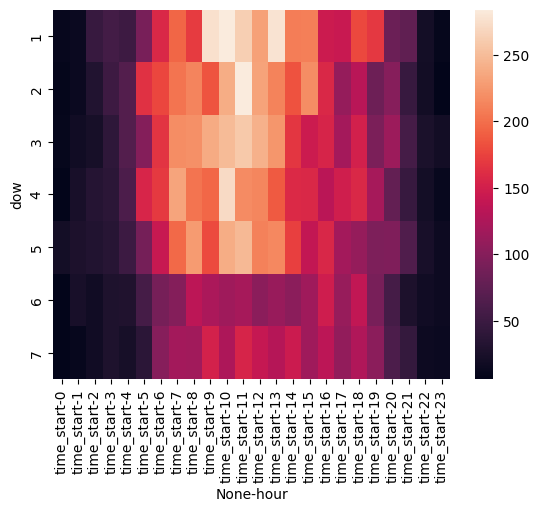

In [56]:
import seaborn as sns

ed = export_data[['time_start']]
ed['hour'] = ed['time_start'].dt.hour
ed['dow'] = ed['time_start'].dt.dayofweek + 1

t = ed.groupby(by=['hour', 'dow']).count()[['time_start']]
sns.heatmap(t.reset_index().pivot(index='dow', columns='hour'))



# plt.xlabel('час начала сессии')